This data consists of two columns.
  - Text
  - label

Text is the statements or messages regarding a particular event/situation.

label feature tells whether the given text is Fake or Real.

As there are only 2 classes, this problem comes under the Binary Classification.

In [2]:
# import data
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")

print(df.shape)

df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df['label'].value_counts()
# check distribution of labels

Fake    5000
Real    4900
Name: label, dtype: int64

data is considerably balanced

In [4]:
#  define fake and real as 0 or 1
df['label_num'] = df.label.map({'Fake': 0, 'Real': 1})

df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


Model without preprocessing

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)


In [6]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7920,)
X_test shape: (1980,)


using sklearn pipeline module create a classification pipeline to classify the Data.

using CountVectorizer with unigram, bigram, and trigrams.

use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.

print the classification report.

In [7]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range= (1,3))),
    ('KNN', (KNeighborsClassifier(n_neighbors= 10, metric= 'euclidean')))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



using cosine as distance

In [8]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range= (1,3))),
    ('KNN', (KNeighborsClassifier(n_neighbors= 10, metric= 'cosine')))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      1000
           1       0.69      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



using random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range= (1,3))),
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.

In [10]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range= (1,3))),
    ('Multi NB', (MultinomialNB(alpha= 0.75)))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [13]:
df['pre_processed_text'] = df.Text.apply(preprocess)

In [14]:
df.head()

,Text,label,label_num,pre_processed_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump Surrogate BRUTALLY Stabs pathetic vide...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow million illegally pu...
4,Democrats say Trump agrees to work on immigrat...,Real,1,democrat Trump agree work immigration bill wal...


model building with preorocessed data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df.pre_processed_text, 
    df.label_num, 
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)


the best model so far is random forest

now check its score

using CountVectorizer with only trigrams.

use RandomForest as the classifier

In [16]:
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range= (3,3))),
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1000
           1       0.99      0.93      0.96       980

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980



using CountVectorizer with unigram, bigram, and trigrams.

use RandomForest as the classifier.

print the classification report.

In [17]:
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range= (1,3))),
    ('random_forest', (RandomForestClassifier()))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



plot confusion matrix for the best model

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[999,   1],
       [  5, 975]], dtype=int64)

Text(69.0, 0.5, 'Truth')

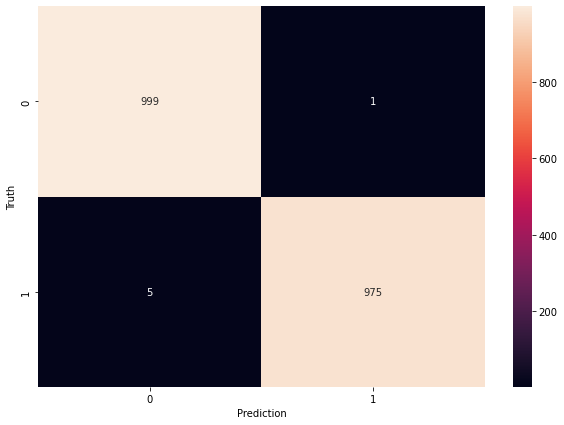

In [19]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')